In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
import pandas as pd


In [2]:
samples= pd.read_csv('dataset/Dataset_clean_textblobvader12112023.csv', encoding='UTF-8')
# samples=samples[['likes','replies','quotes','retweets','searchQuery','clean_content']]
samples.shape

(5830, 17)

In [3]:
print("Jumlah Konten unik:",int(len(samples['clean_content'].unique())))
# samples['clean_content'].unique()

Jumlah Konten unik: 3940


In [4]:
samples.shape

(5830, 17)

In [5]:
samples.drop_duplicates(subset=['clean_content'], inplace=True)
# print(samples)

In [6]:
# print("Jumlah Konten unik:",int(len(samples['clean_content'])))
samples.shape

(3940, 17)

In [7]:
# len(samples['clean_content'].unique())
print("Jumlah Query unik:",int(len(samples['searchQuery'].unique())))
samples['searchQuery'].unique()

Jumlah Query unik: 23


array(['#gibran', '#cakimin', 'mahfud', 'gibran', '#mahfudmd', '#mahfud',
       '#muhaimin', 'cakimin', 'muhaimin', 'mahfudmd', 'anies', '#ganjar',
       'prabowo', '#prabowo', '#anies', 'ganjar', 'anies cakimin',
       'anies muhaimin', 'prabowo gibran', 'ganjar mahfudmd',
       'ganjar mahfud', '#mahfudmd #ganjar', '#cakimin #anies'],
      dtype=object)

## Define Date Timestamp

In [8]:
from datetime import datetime
now = datetime.now() # current date and time
d = now.strftime("%d%m%Y")
print(d)

21112023


## Setup Data Sampling

In [9]:
#get sampling data random
sample=samples.sample(n=500,replace=True,random_state=42)
#get sampling random 50% of data random 
# df = df.sample(n=3,replace=True,frac=0.5,random_state=42)

In [10]:
import numpy as np
# Code Snippet for Character Length Histogram
def plot_character_length_histogram(text):
    text.str.len().\
        hist()

# Code Snippet for Word Number Histogram
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

# Code Snippet for Word Length Histogram
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x: [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

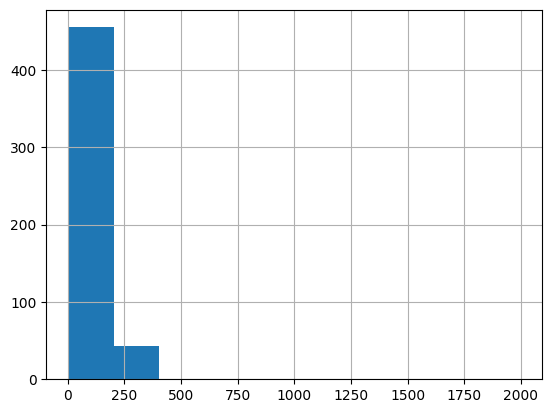

In [11]:
plot_character_length_histogram(sample['clean_content'])

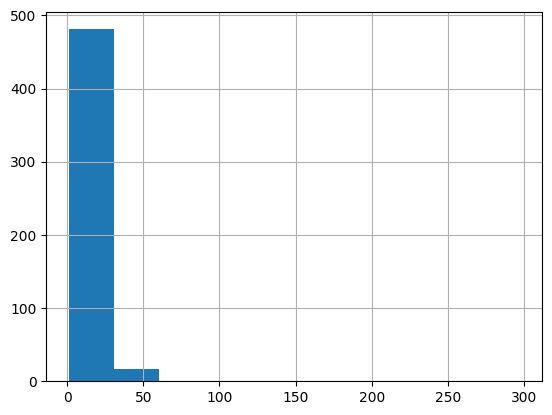

In [12]:
plot_word_number_histogram(sample['clean_content'])

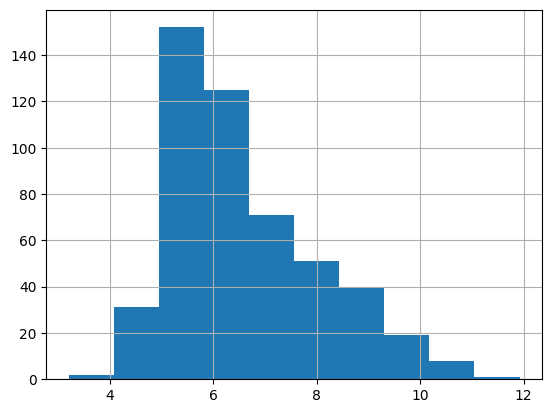

In [13]:
plot_word_length_histogram(sample['clean_content'])

## Split Dataset

In [14]:
sample.head()

,likes,replies,quotes,retweets,searchQuery,clean_content,tanggal,date,textblob_sentiment,textblob_sentiment_assessment,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos,vader_sentiment
3775,0,0,0,0,#anies,semangka aminforfreepalestine anies,11/5/2023,11/5/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0000,0.0,1.000,0.000,Neutral
4415,0,0,0,0,anies muhaimin,muhaimin support system pas banget anies they ...,11/7/2023,11/7/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=1.0, asse...",0.0,1.0,0.6369,0.0,0.698,0.302,Positive
971,1,1,0,0,mahfud,ganjar proses lapis maksuba sabar libat bahan ...,11/7/2023,11/7/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0000,0.0,1.000,0.000,Neutral
1473,91,3,0,47,muhaimin,insyaallah allah rakyat dukung palestina dukun...,11/5/2023,11/5/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0000,0.0,1.000,0.000,Neutral
1261,0,0,0,0,#mahfudmd,juang pemuda ganjarpranowo mahfudmd orang gofu...,11/6/2023,11/6/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0000,0.0,1.000,0.000,Neutral


In [138]:
dataset=sample
X = dataset['clean_content']     # Define feature matriX
y = dataset['vader_sentiment']         # Define target feature matriX
jumlahdatauji=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=jumlahdatauji, random_state=42, stratify=y)

datalatih=('Dataset shopee {}:{} \n [INFO] Sebaran kelas pada training  set: \n Negative: \t {} \n Neutral: \t{} \n Positive:\t{} \n'.format((1-jumlahdatauji)*100,jumlahdatauji*100,sum(y_train=='Negative'), sum(y_train=='Neutral'), sum(y_train=='Positive')))
datauji=('[INFO] Sebaran kelas pada testing set:\n Negative: \t{}\n Neutral: \t{}\n Positive:\t{} \n'.format(sum(y_test=='Negative'), sum(y_test=='Neutral'), sum(y_test=='Positive')))

dimensi_data=('[INFO] Shape Data: \n X_train: \t {} \n X_test: \t {} \n y_train: \t {} \n y_test: \t {} \n'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

with open('hasil/datauji-mlbb.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(datalatih))
    f.writelines(''.join(datauji))
    f.writelines(''.join(dimensi_data))

print(datalatih, datauji, dimensi_data)
dtuji=int(jumlahdatauji*100)
dtlatih=(100-(dtuji))

Dataset shopee 75.0:25.0 
 [INFO] Sebaran kelas pada training  set: 
 Negative: 	 11 
 Neutral: 	344 
 Positive:	20 
 [INFO] Sebaran kelas pada testing set:
 Negative: 	3
 Neutral: 	115
 Positive:	7 
 [INFO] Shape Data: 
 X_train: 	 (375,) 
 X_test: 	 (125,) 
 y_train: 	 (375,) 
 y_test: 	 (125,) 



## Save Splitted Dataset

In [139]:
# print(dataset)

      likes  replies  quotes  retweets     searchQuery  \
3775      0        0       0         0          #anies   
4415      0        0       0         0  anies muhaimin   
971       1        1       0         0          mahfud   
1473     91        3       0        47        muhaimin   
1261      0        0       0         0       #mahfudmd   
...     ...      ...     ...       ...             ...   
1535      1        0       0         0       #muhaimin   
2183      1        0       0         0        mahfudmd   
3260      0        0       0         0          ganjar   
5423    727       46       3       191   ganjar mahfud   
692    1366       27      10       425        muhaimin   

                                          clean_content    tanggal       date  \
3775                semangka aminforfreepalestine anies  11/5/2023  11/5/2023   
4415  muhaimin support system pas banget anies they ...  11/7/2023  11/7/2023   
971   ganjar proses lapis maksuba sabar libat bahan ...  11/

In [140]:
# dataset.to_csv( "hasil/5_dataset__"+d+".csv", index=False, encoding='utf-8-sig')
X_train.to_csv( "hasil/5_train_data_"+str(dtlatih)+"_"+d+".csv", index=False, encoding='utf-8-sig')
X_test.to_csv( "hasil/5_test_data_"+str(dtuji)+"_"+d+".csv", index=False, encoding='utf-8-sig')

# Term Weighting TFIDF X Training and Y Testing

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer

In [142]:
# ngram_range = (1,2) #bigram
ngram_range = (1,3) #trigram

min_df = 5

tfidf = TfidfVectorizer(ngram_range=ngram_range, min_df=min_df)
# tfidf = TfidfVectorizer(max_features=1000)
# vectors = tfidf.fit_transform(dataset.clean_content).toarray()
vectors = tfidf.fit_transform(X_train).toarray()
words_df = pd.DataFrame(vectors, columns=tfidf.get_feature_names_out())
words_df.head(10)


,abu,abu janda,adil,air,ajak,allah,amanah,amin,amin anies,amin menang,...,unggul,unggul hasil,unggul hasil survei,usman,video,viral,wakil,wakil presiden,warga,ya
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.397575,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.455749,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.162966,0.188381,0.188381,0.000000,0.0,0.365458,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [143]:

X_train = tfidf.fit_transform(X_train).toarray()
# print(X_train)
columns=tfidf.get_feature_names_out()
# print(columns)
train_words_df = pd.DataFrame(X_train, columns=tfidf.get_feature_names_out())
train_words_df.head(10)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.50688615 0.50688615 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
['abu' 'abu janda' 'adil' 'air' 'ajak' 'allah' 'amanah' 'amin'
 'amin anies' 'amin menang' 'aminajadulu' 'aminforfreepalestine'
 'aminforfreepalestine anies' 'anak' 'anies' 'anies baswedan'
 'anies baswedan muhaimin' 'anies cak' 'anies cak imin' 'anies cakimin'
 'anies muhaimin' 'aniesbaswedan' 'aniesbaswedan cakimin' 'aniesmuhaimin'
 'anis' 'anwar' 'anwar usman' 'arti' 'bacawapres' 'baliho' 'banget'
 'bangsa' 'baswedan' 'baswedan muhaimin' 'baswedan muhaimin iskandar'
 'bawa' 'berat' 'bersamaindonesiamaju' 'biar' 'bilang' 'bukti'
 'bukti survei' 'bu

,abu,abu janda,adil,air,ajak,allah,amanah,amin,amin anies,amin menang,...,unggul,unggul hasil,unggul hasil survei,usman,video,viral,wakil,wakil presiden,warga,ya
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.397575,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.455749,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.162966,0.188381,0.188381,0.000000,0.0,0.365458,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [144]:
train_words_df.to_csv( "hasil/train_tfidf_trigram_"+str(dtlatih)+"_"+str(d)+".csv", index=False, encoding='utf-8-sig')

## TFIDF YTEST

In [145]:
X_test = tfidf.transform(X_test).toarray()
# print(X_test)
columnstest=tfidf.get_feature_names_out()
# print(columnstest)
test_words_df = pd.DataFrame(X_test, columns=tfidf.get_feature_names_out())
test_words_df.head(10)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.40308735 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
['abu' 'abu janda' 'adil' 'air' 'ajak' 'allah' 'amanah' 'amin'
 'amin anies' 'amin menang' 'aminajadulu' 'aminforfreepalestine'
 'aminforfreepalestine anies' 'anak' 'anies' 'anies baswedan'
 'anies baswedan muhaimin' 'anies cak' 'anies cak imin' 'anies cakimin'
 'anies muhaimin' 'aniesbaswedan' 'aniesbaswedan cakimin' 'aniesmuhaimin'
 'anis' 'anwar' 'anwar usman' 'arti' 'bacawapres' 'baliho' 'banget'
 'bangsa' 'baswedan' 'baswedan muhaimin' 'baswedan muhaimin iskandar'
 'bawa' 'berat' 'bersamaindonesiamaju' 'biar' 'bilang' 'bukti'
 'bukti survei' 'bu

,abu,abu janda,adil,air,ajak,allah,amanah,amin,amin anies,amin menang,...,unggul,unggul hasil,unggul hasil survei,usman,video,viral,wakil,wakil presiden,warga,ya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258303,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.371637,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.650285,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.579566,0.0,0.0,0.0,0.0


In [146]:
test_words_df.to_csv( "hasil/test_tfidf_trigram_"+str(dtuji)+"_"+str(d)+".csv", index=False, encoding='utf-8-sig')

## Training and Testing

In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Models

In [148]:
C=1.0
# Create and train a random forest classifier
# forest = RandomForestClassifier()
models = [
          # ('k-NN', KNeighborsClassifier()),
          ('SVC linear kernel', SVC(kernel='linear',C=C,max_iter=10000)),
          ('SVC RBF kernel', SVC(kernel='rbf',gamma=1,C=C)), 
          ('SVC Polynomial (degree 3)', SVC(kernel='poly',degree=3,C=C)),
          ('Naive Bayes', MultinomialNB()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Random Forest',RandomForestClassifier(n_estimators=50)),
          ('Regresi Linier',LogisticRegression()),
        ]


In [149]:
for name, clf in models:
  clf.fit(X_train, y_train)
  train_acc = accuracy_score(y_train, clf.predict(X_train))
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Training Menggunakan {}, akurasi pada training set: {} \n'.format(name, train_acc))
  with open('hasil/training_result_pilpres_sample_'+str(dtlatih)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

[INFO] Training Menggunakan SVC linear kernel, akurasi pada training set: 0.9306666666666666 

[INFO] Training Menggunakan SVC RBF kernel, akurasi pada training set: 0.936 

[INFO] Training Menggunakan SVC Polynomial (degree 3), akurasi pada training set: 0.9893333333333333 

[INFO] Training Menggunakan Naive Bayes, akurasi pada training set: 0.9173333333333333 

[INFO] Training Menggunakan Decision Tree, akurasi pada training set: 0.9973333333333333 

[INFO] Training Menggunakan Random Forest, akurasi pada training set: 0.9973333333333333 

[INFO] Training Menggunakan Regresi Linier, akurasi pada training set: 0.9173333333333333 



## Pipeline And Gridsearch CV

In [150]:
# from sklearn.decomposition import TruncatedSVD
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import make_pipeline
# from pprint import pprint
# from time import time
# from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold


In [151]:
# pipe = Pipeline([
#     ('bag_of_words', TfidfVectorizer(ngram_range=ngram_range, min_df=min_df)),
#     ('estimator', SVC(random_state=42))])

# #create GridSearchCV object with set of possible parameters
# Cs = [0.001, 0.01, 0.1, 1, 10, 100]
# gammas = [0.001, 0.01, 0.1, 1, 10,100]
# kernel = ['linear','rbf','poly','sigmoid']
# # kernel = ['rbf']
# param_grid={
#     'estimator__C': Cs,
#     'estimator__gamma': gammas,
#     'estimator__kernel': kernel
# }

In [152]:
# %%time
# # scoring = {'AUCe': 'roc_auc', 'Accuracy': 'accuracy', 'prec':  'precision', 'rec': 'recall', 'f1s': 'f1','spec':make_scorer(recall_score,pos_label=0)}
# # scoring=['accuracy','recall_macro','precision_macro','f1_macro']
# grid = GridSearchCV(pipe, param_grid=param_grid,refit = True, verbose = 3,scoring='accuracy',n_jobs=-1)

# grid.fit(X_train, y_train)
# y_pred = grid.predict(X_test)

## Testing 

In [153]:
for name, clf in models:
  # clf_predict = 
  clf.predict(X_test)
  test_acc = accuracy_score(y_test, clf.predict(X_test))
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, test_acc))
  # printed=('[INFO] testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, train_acc))
  with open('hasil/testing_result_pilpres_sample_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

[INFO] Testing Menggunakan SVC linear kernel, akurasi pada testing set: 0.92 

[INFO] Testing Menggunakan SVC RBF kernel, akurasi pada testing set: 0.928 

[INFO] Testing Menggunakan SVC Polynomial (degree 3), akurasi pada testing set: 0.928 

[INFO] Testing Menggunakan Naive Bayes, akurasi pada testing set: 0.92 

[INFO] Testing Menggunakan Decision Tree, akurasi pada testing set: 0.872 

[INFO] Testing Menggunakan Random Forest, akurasi pada testing set: 0.928 

[INFO] Testing Menggunakan Regresi Linier, akurasi pada testing set: 0.92 



## Cross Validation

In [154]:
# cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# k=[3,5,7,10,12,15]
k=[5,7,12]
for x in (k):
  for name, model in models:
    clf.fit(X_train, y_train)
    cv = KFold(n_splits=x, random_state=50, shuffle=True)
    cross_val_acc = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
    printed_dataset=('Dataset: {} \t'.format('mlbb'))
    printed=('[INFO] {}x Cross Validation Menggunakan {}, Cross-validation akurasi: {:5f} (+/- {:5f}) \n'.format(x,name, cross_val_acc.mean(), cross_val_acc.std() * 2))
    with open('hasil/training_result_pilpres2024_crossval_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
      f.writelines(''.join(printed_dataset))
      f.writelines(''.join(printed))
    
    print(printed)
    # f.writelines(''.join("\n"))

[INFO] 5x Cross Validation Menggunakan SVC linear kernel, Cross-validation akurasi: 0.917333 (+/- 0.056944) 

[INFO] 5x Cross Validation Menggunakan SVC RBF kernel, Cross-validation akurasi: 0.917333 (+/- 0.056944) 

[INFO] 5x Cross Validation Menggunakan SVC Polynomial (degree 3), Cross-validation akurasi: 0.917333 (+/- 0.056944) 



[INFO] 5x Cross Validation Menggunakan Naive Bayes, Cross-validation akurasi: 0.917333 (+/- 0.056944) 

[INFO] 5x Cross Validation Menggunakan Decision Tree, Cross-validation akurasi: 0.917333 (+/- 0.056944) 

[INFO] 5x Cross Validation Menggunakan Random Forest, Cross-validation akurasi: 0.917333 (+/- 0.056944) 

[INFO] 5x Cross Validation Menggunakan Regresi Linier, Cross-validation akurasi: 0.917333 (+/- 0.056944) 

[INFO] 7x Cross Validation Menggunakan SVC linear kernel, Cross-validation akurasi: 0.917241 (+/- 0.075045) 

[INFO] 7x Cross Validation Menggunakan SVC RBF kernel, Cross-validation akurasi: 0.917241 (+/- 0.075045) 

[INFO] 7x Cross Validation Menggunakan SVC Polynomial (degree 3), Cross-validation akurasi: 0.917241 (+/- 0.075045) 

[INFO] 7x Cross Validation Menggunakan Naive Bayes, Cross-validation akurasi: 0.917241 (+/- 0.075045) 

[INFO] 7x Cross Validation Menggunakan Decision Tree, Cross-validation akurasi: 0.917241 (+/- 0.075045) 

[INFO] 7x Cross Validation Mengg

## Confusion Matrix

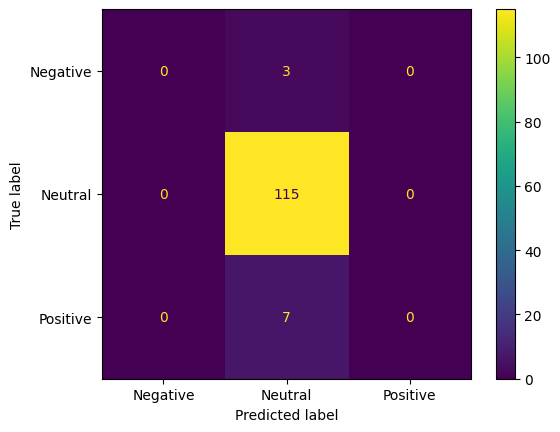

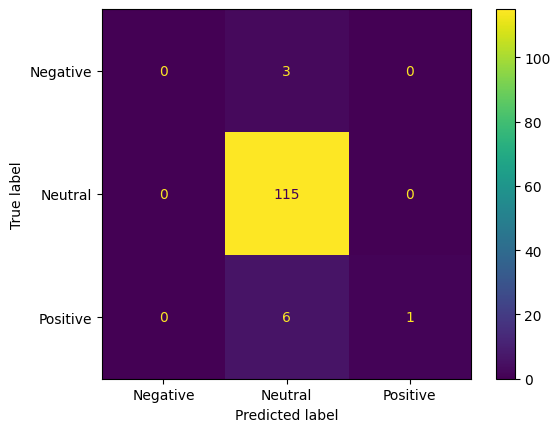

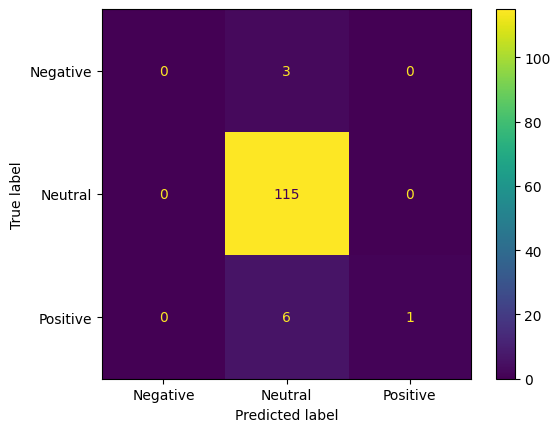

KeyboardInterrupt: 

In [163]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

for name, model in models:
  predictions=model.predict(X_test)
  cm = confusion_matrix(y_test, predictions, labels=model.classes_)
  # plot_confusion_matrix(model,X_train, y_train) 
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
  disp.plot()
  # plt.title('Confusion Matrix: {}'.format(name))
  plt.show()